In [9]:
import json
from typing import List
import matplotlib.pyplot as plt


def calculate_avg_memory(path: str) -> List[float]:
    memory = []
    test = []
    scores = []
    token_lengths = []
    time = []
    mem_per_token = []
    input_len = []
    tok_per_sec = []
    model_memory = 0
    output_mem = []
    input_mem = []
    output_len = []
    mem = []
    i = 0
    with open(path, "r") as file:
        for line in file:
            data = json.loads(line.strip())
            if not "input_len" in data:
                continue
            t = data["time_metric"]
            time_taken = t[len(t) -1 ] - t[0]
            time.append(time_taken)
            tok_per_sec.append(data["output_len"] / time_taken)
            input_kv_memory = data["input_kv_memory"]
            memory_usage = data["memory_usage"]
            model_memory = 15284.85888
            output_len.append(data["output_len"])
            
            scores.append( float(data["score"]) )
            token_lengths.append(len(memory_usage))
            #differences = [usage for usage in memory_usage]
            differences = [usage for usage in memory_usage]
            differences.insert(0, model_memory)
            kv_memory = memory_usage[len(memory_usage)-1] - model_memory
            input_mem.append(memory_usage[0] - model_memory)
            output_mem.append(memory_usage[len(memory_usage)-1] - memory_usage[1])
            mem_per_token.append((max(memory_usage) - model_memory)/(data["output_len"] + data["input_len"]))
            input_len.append(data["input_len"])
            memory.append(differences)
            test.append(input_kv_memory-model_memory)
            i+= 1
            #test.append(differences)
    print("input", sum(input_mem)/len(input_mem))
    print("output", sum(output_mem)/len(output_mem))
    print("output len", sum(output_len) / len(output_len))
    print("model memory", model_memory)
    print("")
    longest = 0
    print("data count ", len(memory))
    #print(time)
    print("time", sum(time) / len(time))
    for r in memory:
        length = len(r)
        if longest < length:
            longest = length
    
    avg_mem = []

    token_lengths.sort()

    largest = token_lengths[int(len(memory)*0.9)]
    print(largest)

    usage = largest
    
    print("score: ", sum(scores) / len(scores))
    print("mem per token: ", sum(mem_per_token)/len(mem_per_token))
    print("token per sec: ", sum(tok_per_sec) / len(tok_per_sec))
    print("input_len: ", sum(input_len)/ len(input_len))
    for i in range(largest):
        total = 0
        count = 0
        for r in memory:
            if len(r) > i:
                total += r[i]
                count += 1
        avg_mem.append(total/count)
    w = avg_mem[:largest].copy()
    return avg_mem

def plot(lines: List[List[float]]):


    # Plot each sublist as a separate line
    plt.figure(figsize=(10, 6))
    for idx, line in enumerate(lines):
        plt.plot(line, label=f'Line {idx+1}')

    # Adding labels, title, and legend
    plt.title('Line Graph of Multiple Lists')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()



In [3]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.5 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 7.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl (3.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib] 7/8 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


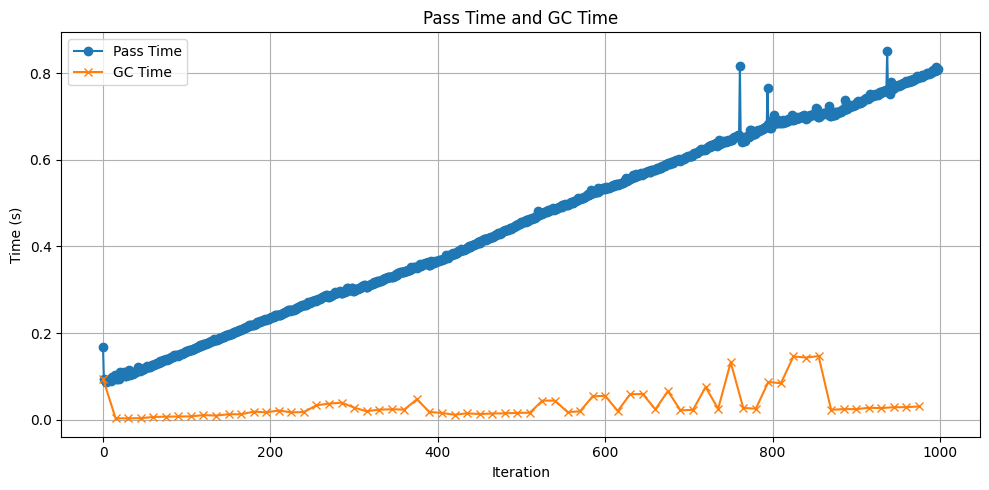

In [7]:
import json
import matplotlib.pyplot as plt

# Load data from file
file_path = '/Users/al01989354/Desktop/python/research/tridecode/reproduction/out/gc_overhead.jsonl'
with open(file_path, 'r') as f:
    data = json.load(f)

pass_time = data["pass_time"]
gc_time = data["gc_time"]

# Create x-axis for pass_time and gc_time
x_pass = list(range(len(pass_time)))
x_gc = [i * 15 for i in range(len(gc_time))]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_pass, pass_time, label='Pass Time', marker='o')
plt.plot(x_gc, gc_time, label='GC Time', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Time (s)')
plt.title('Pass Time and GC Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import csv


def write_csvs(path, lst1, lst2):
    f = open(path, "w")
    writer = csv.writer(f)
    writer.writerow(["x", "y1", "y2"])
    w = list(range(len(lst1) + 1))
    w.pop(0)
    writer.writerows(zip(w,lst1, lst2))  # Data rows

def write_csv(path, lst):
    f = open(path, "w")
    writer = csv.writer(f)
    writer.writerow(["x", "y"])
    w = list(range(len(lst) + 1))
    w.pop(0)
    writer.writerows(zip(w,lst))  # Data rows

In [3]:
from enum import Enum

class TaskType(Enum):
    HUMAN_EVAL = 1
    GSM8K = 2
    CNN = 3
    WMT = 4
class ModelType(Enum):
    LLAMA3 = 1
    PHI35 = 2
    MISTRAL = 3
task_type = TaskType.WMT
model_type = ModelType.PHI35

In [5]:
import os

origin_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/origin/{task_type.name}/15_1000.jsonl')
tree_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/tree/{task_type.name}/15_1000.jsonl')

plot([origin_avg, tree_avg, ])
write_csvs(f"9_{task_type}.csv",origin_avg, tree_avg)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\user1\\Desktop\\programming\\sinica\\tridecode\\reproduction/final_out/PHI35/origin/WMT/15_1000.jsonl'

input 798.1946316800002
output 310.10208768000007
output len 39.05
model memory 15284.85888

data count  100
time 3.2519142961502077
95
score:  0.4921921629650535
mem per token:  9.991949922594666
token per sec:  13.012168680616833
input_len:  55.12
input 103.87762688000028
output 133.38282495999994
output len 39.13
model memory 15284.85888

data count  100
time 3.3116489601135255
95
score:  0.491335031794476
mem per token:  2.6999161310386324
token per sec:  12.55499297178335
input_len:  55.12


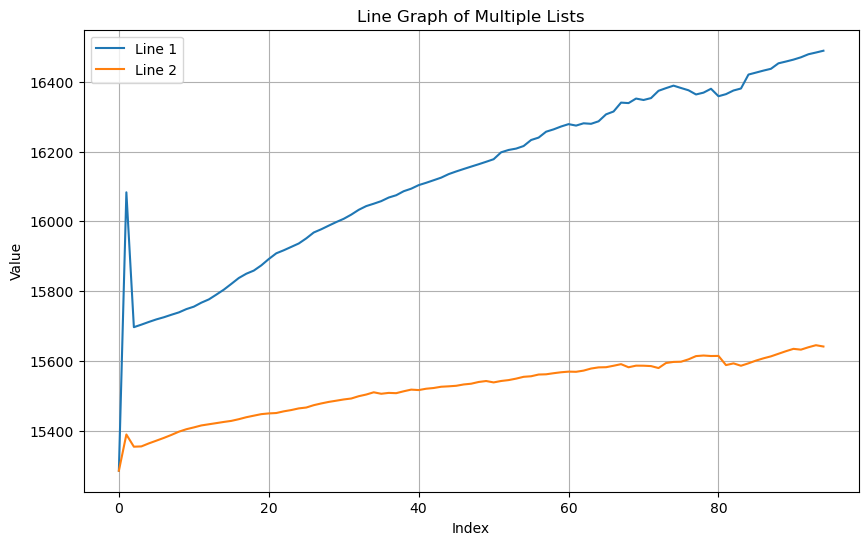

In [10]:
import os

origin_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/origin/{task_type.name}/9_1000.jsonl')
tree_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/tree/{task_type.name}/9_1000.jsonl')

plot([origin_avg, tree_avg, ])
write_csvs(f"9_{task_type}.csv",origin_avg, tree_avg)

input 273.66896128000025
output 94.80898047999996
output len 36.18
model memory 15284.85888

data count  100
time 2.5343327069282533
94
score:  0.4918340294932139
mem per token:  3.4384831662902617
token per sec:  15.41206991039734
input_len:  55.12
input 103.87760128000028
output 55.44187392000014
output len 35.31
model memory 15284.85888

data count  100
time 2.4837525343894957
79
score:  0.4926965385766699
mem per token:  1.4961090581863852
token per sec:  14.881423583451538
input_len:  55.12


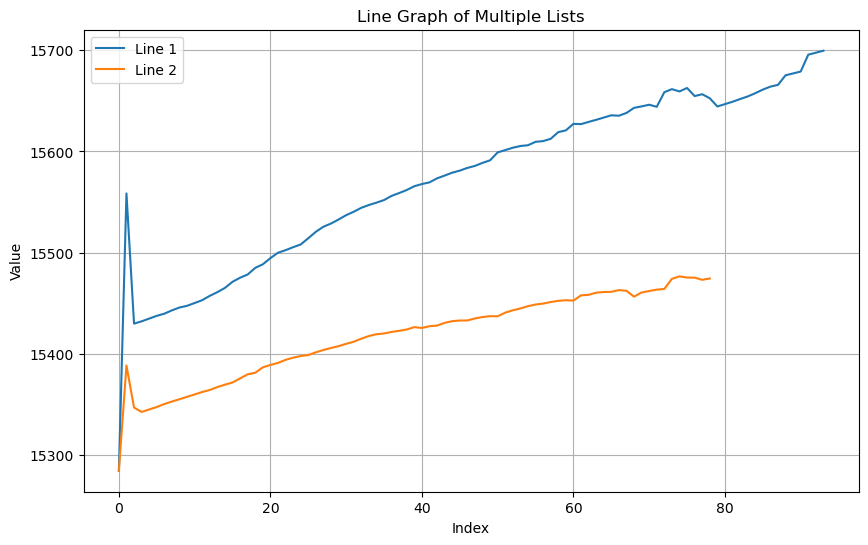

In [11]:
import os

origin_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/origin/{task_type.name}/3_1000.jsonl')
tree_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/tree/{task_type.name}/3_1000.jsonl')

plot([origin_avg, tree_avg, ])
write_csvs(f"3_{task_type}.csv",origin_avg, tree_avg)

input 96.92444160000021
output 30.667898879999903
output len 40.14
model memory 15284.85888

data count  100
time 2.234157979488373
74
score:  0.48558357730153445
mem per token:  1.1593870773187285
token per sec:  18.332435746305716
input_len:  55.12


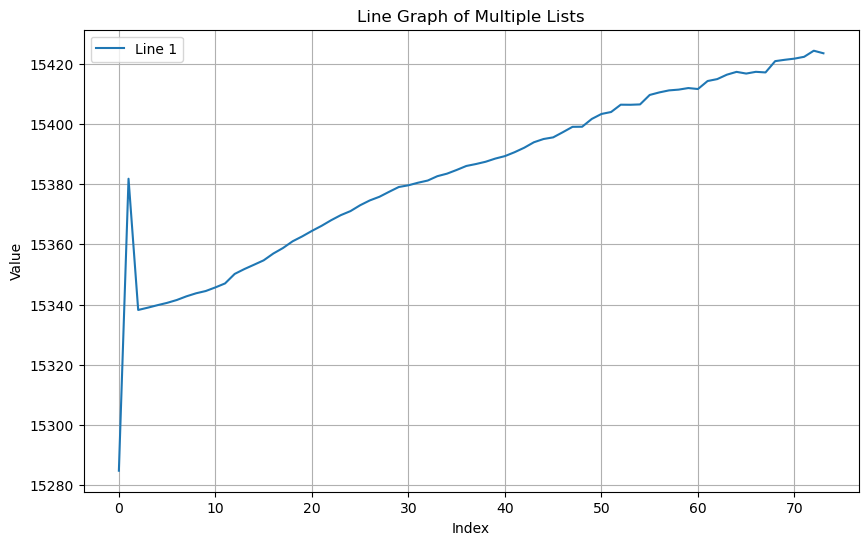

In [12]:
import os

origin_avg = calculate_avg_memory(f'{os.getcwd()}/final_out/{model_type.name}/origin/{task_type.name}/1_1000.jsonl')

plot([origin_avg])

In [1]:
import json
from typing import List
import matplotlib.pyplot as plt


def calculate_sequential(path: str) -> List[float]:
    memory = []
    test = []
    scores = []
    token_lengths = []
    time = []
    mem_per_token = []
    input_len = []
    tok_per_sec = []
    with open(path, "r") as file:
        for line in file:
            data = json.loads(line.strip())
            if not "input_len" in data:
                continue
            t = data["time_metric"]
            time_taken = t[len(t) -1 ] - t[0]
            time.append(time_taken)
            tok_per_sec.append(data["output_len"] / time_taken)
            input_kv_memory = data["input_kv_memory"]
            memory_usage = data["memory_usage"]
            model_memory = data["model_memory"]
            scores.append(data["score"])
            token_lengths.append(len(memory_usage))
            #differences = [usage for usage in memory_usage]
            differences = [usage - model_memory for usage in memory_usage]
            kv_memory = memory_usage[len(memory_usage)-1] - model_memory
            mem_per_token.append(kv_memory/(data["output_len"] + data["input_len"]))
            input_len.append(data["input_len"])
            memory.append(differences)
            test.append(input_kv_memory-model_memory)
            #test.append(differences)
    longest = 0
    print("data count ", len(memory))
    #print(time)
    print("time", sum(time) / len(time))
    for r in memory:
        length = len(r)
        if longest < length:
            longest = length
    
    avg_mem = []

    token_lengths.sort()

    largest = token_lengths[int(len(memory)*0.9)]
    print(largest)
    
    print("score: ", sum(scores) / len(scores))
    print("mem per token: ", sum(mem_per_token)/len(mem_per_token))
    print("token per sec: ", sum(tok_per_sec) / len(tok_per_sec))
    print("input_len: ", sum(input_len)/ len(input_len))
    for i in range(largest):
        total = 0
        count = 0
        for r in memory:
            if len(r) > i:
                total += r[i]
                count += 1
        avg_mem.append(total/count)
    return avg_mem

def plot(lines: List[List[float]]):


    # Plot each sublist as a separate line
    plt.figure(figsize=(10, 6))
    for idx, line in enumerate(lines):
        plt.plot(line, label=f'Line {idx+1}')

    # Adding labels, title, and legend
    plt.title('Line Graph of Multiple Lists')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

task_type = "HUMAN_EVAL"

data count  1
time 50.33566927909851
243
score:  0.0
mem per token:  10.556016597510373
token per sec:  1.6091968411282178
input_len:  160.0


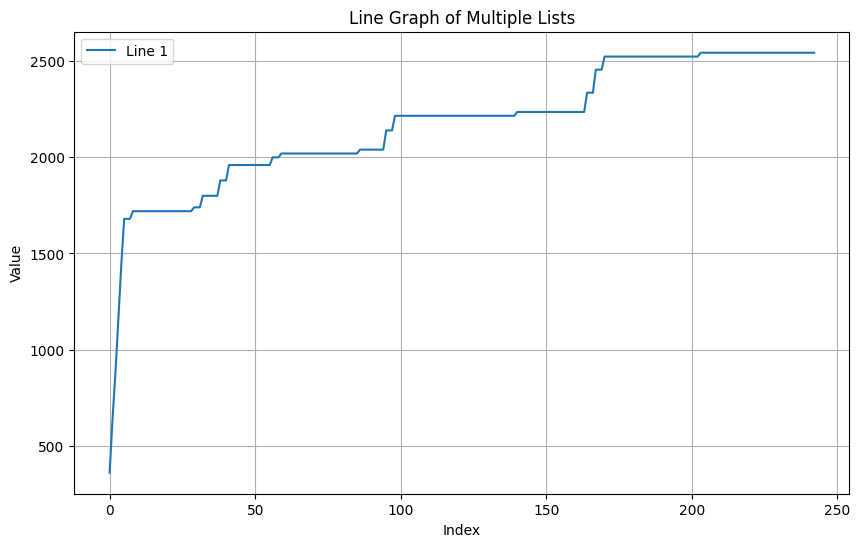

In [3]:
sequential = calculate_sequential(f'/work/u4320956/tree_decoding/benchmark/out/sequential/HUMAN_EVAL/3_1000.jsonl')

plot([sequential])